목적 : 토픽모델링을 활용해서 유저가 선택할 태그와 실제 사용할 태그 선택하기

In [86]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import json
import pandas as pd

plt.rcParams['font.family'] = "AppleGothic"

In [87]:
with open('/Users/hyo-cheolahn/Documents/Projects/Book-Recommendation/data/scraping/all_book_data_ver3.json', "r") as file:
    data = json.load(file)


In [88]:
from kiwipiepy import Kiwi

kiwi = Kiwi(model_type='sbg', typos='basic')

with open('stopwords-ko.txt', 'r', encoding='utf-8') as file:
    stopwords_add = [line.strip() for line in file]  


# from kiwipiepy.utils import Stopwords
# stopwords = Stopwords()
# stopwords.add(stopwords_add)

In [91]:
test_sentence = " ".join(stopwords_add)
print("Test Sentence:", test_sentence)

# 형태소 분석 수행
tokens = kiwi.tokenize(test_sentence)

# 전체 형태소 분석 결과 생성
analysis_results = []
for token in tokens:
    analysis_results.append(f"형태소: {token.form}, 품사: {token.tag}\n")

# 불용어 제거
filtered_tokens = [token.form for token in tokens if (token.form, token.tag) not in analysis_results]

# 불용어 제거 후 결과 추가
analysis_results.append("\n불용어 제거 후:\n")
analysis_results.append(" ".join(filtered_tokens) + "\n")

# 결과를 텍스트 파일로 저장
output_file = "analysis_results.txt"
with open(output_file, "w", encoding="utf-8") as file:
    file.writelines(analysis_results)

print(f"분석 결과가 '{output_file}' 파일로 저장되었습니다.")

Test Sentence: 가 가까스로 가령 각 각각 각자 각종 갖고말하자면 같다 같이 개의치않고 거니와 거바 거의 것 것과 같이 것들 게다가 게우다 겨우 견지에서 결과에 이르다 결국 결론을 낼 수 있다 겸사겸사 고려하면 고로 곧 공동으로 과 과연 관계가 있다 관계없이 관련이 있다 관하여 관한 관해서는 구 구체적으로 구토하다 그 그들 그때 그래 그래도 그래서 그러나 그러니 그러니까 그러면 그러므로 그러한즉 그런 까닭에 그런데 그런즉 그럼 그럼에도 불구하고 그렇게 함으로써 그렇지 그렇지 않다면 그렇지 않으면 그렇지만 그렇지않으면 그리고 그리하여 그만이다 그에 따르는 그위에 그저 그중에서 그치지 않다 근거로 근거하여 기대여 기점으로 기준으로 기타 까닭으로 까악 까지 까지 미치다 까지도 꽈당 끙끙 끼익 나 나머지는 남들 남짓 너 너희 너희들 네 넷 년 논하지 않다 놀라다 누가 알겠는가 누구 다른 다른 방면으로 다만 다섯 다소 다수 다시 말하자면 다시말하면 다음 다음에 다음으로 단지 답다 당신 당장 대로 하다 대하면 대하여 대해 말하자면 대해서 댕그 더구나 더군다나 더라도 더불어 더욱더 더욱이는 도달하다 도착하다 동시에 동안 된바에야 된이상 두번째로 둘 둥둥 뒤따라 뒤이어 든간에 들 등 등등 딩동 따라 따라서 따위 따지지 않다 딱 때 때가 되어 때문에 또 또한 뚝뚝 라 해도 령 로 로 인하여 로부터 로써 륙 를 마음대로 마저 마저도 마치 막론하고 만 못하다 만약 만약에 만은 아니다 만이 아니다 만일 만큼 말하자면 말할것도 없고 매 매번 메쓰겁다 몇 모 모두 무렵 무릎쓰고 무슨 무엇 무엇때문에 물론 및 바꾸어말하면 바꾸어말하자면 바꾸어서 말하면 바꾸어서 한다면 바꿔 말하면 바로 바와같이 밖에 안된다 반대로 반대로 말하자면 반드시 버금 보는데서 보다더 보드득 본대로 봐 봐라 부류의 사람들 부터 불구하고 불문하고 붕붕 비걱거리다 비교적 비길수 없다 비로소 비록 비슷하다 비추어 보아 비하면 뿐만 아니라 뿐만아니라 뿐이다 삐걱 삐걱거리다 사 삼 상대적으로 말하자면 생각한대로 

## 추가할 형태소: 
- 형태소: 습니다, 품사: EF
- 형태소: 과, 품사: JC

In [94]:
import os
from kiwipiepy import Kiwi

# Kiwi 초기화
kiwi = Kiwi(model_type='sbg', typos='basic')

# 분석 결과 파일 경로
file_path = "analysis_results.txt"

# 불용어 리스트 초기화
stopwords = []

# analysis_results.txt 파일 읽기
if os.path.exists(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        for line in file:
            line = line.strip()
            # 형태소와 품사 파싱
            if line.startswith("형태소:") and ", 품사:" in line:
                parts = line.split(", 품사:")
                form = parts[0].replace("형태소:", "").strip()
                tag = parts[1].strip()
                stopwords.append((form, tag))
else:
    print(f"파일 '{file_path}'이 존재하지 않습니다.")

# 테스트 문장
test_sentence = "가까스로 나는 형태소 분석과 불용어 제거를 테스트하고 있습니다. 그는 안녕하세요~ 먹는 음식이 맛있다."

# 형태소 분석 수행
tokens = kiwi.tokenize(test_sentence)


# 불용어 제거
filtered_tokens = [token.form for token in tokens if (token.form, token.tag) not in stopwords]

# 결과 출력
print("\n불용어 제거 후:")
print(" ".join(filtered_tokens))


불용어 제거 후:
나 형태소 분석 불 용어 제거 테스트 . 안녕하세요 ~ 먹 음식 맛있 .


In [84]:
df = pd.DataFrame()

texts = []
texts_tokenized = []
for el in data:
    # 여러 줄의 데이터를 정리하여 리스트 생성
    t1 = [x.split(':')[-1].strip() for x in el['description'].split('\n')]

    # 형태소 분석 및 불용어 제거
    t2 = [
        ' '.join(
            [token.form for token in kiwi.tokenize(sentence) if (token.form, token.tag) not in stopwords]
        ) for sentence in t1
    ]

    # 원본 텍스트와 처리된 텍스트 추가
    # texts.append(' '.join(t1))
    texts_tokenized.append(' '.join(t2))

# df['texts_ds'] = texts
df['texts_ds_tokenized'] = texts_tokenized
df.head()

,texts_ds_tokenized
0,"행복 찾 방법 불행 수비력 기르 58 가지 인생 이야기 《 cm 다이빙 》 , 《 ..."
1,"감각 지니 , 디자인 잘 , 브랜드 만들 ‘ ’ 섬세 ‘ 감각 ’ 구조 수용 단독 ..."
2,“ 문상훈 새롭 문상훈 얼굴 책 . ” ( 작가 이슬아 ) 133 만 명 구독자 보...
3,"“ 코난 던 나 일본어 먹 살 ‘ 잘 되 샌님 일본어 덕질 기 26 만 구독자 , ..."
4,"마지막 기에 충만 지 삶 , 죽음 관점 새롭 해석 살 오늘 “ 잘 살 을 지 이야기..."


In [95]:
texts = []
texts_tokenized = []
for el in data:
    # 여러 줄의 데이터를 정리하여 리스트 생성
    t1 = [x.split(':')[-1].strip() for x in el['key_sentences'].split('\n')]

    # 형태소 분석 및 불용어 제거
    t2 = [
        ' '.join(
            [token.form for token in kiwi.tokenize(sentence) if (token.form, token.tag) not in stopwords]
        ) for sentence in t1
    ]

    # 원본 텍스트와 처리된 텍스트 추가
    # texts.append(' '.join(t1))
    texts_tokenized.append(' '.join(t2))

# df['texts_ks'] = texts
df['texts_ks_tokenized'] = texts_tokenized
df.head()

In [83]:

df_combined = df['texts_ds_tokenized'].str.cat(df['texts_ks_tokenized'], sep=' | ')
df_combined.head()

0    행복 찾 방법 불행 수비력 기르 58 가지 인생 이야기 《 cm 다이빙 》 , 《 ...
1    감각 지니 , 디자인 잘 , 브랜드 만들 ‘ ’ 섬세 ‘ 감각 ’ 구조 수용 단독 ...
2    “ 문상훈 새롭 문상훈 얼굴 책 . ” ( 작가 이슬아 ) 133 만 명 구독자 보...
3    “ 코난 던 나 일본어 먹 살 ‘ 잘 되 샌님 일본어 덕질 기 26 만 구독자 , ...
4    마지막 기에 충만 지 삶 , 죽음 관점 새롭 해석 살 오늘 “ 잘 살 을 지 이야기...
Name: texts_ds_tokenized, dtype: object

In [41]:
import gensim
from gensim import corpora, models

docs=[ d.split() for d in df_combined.to_list()]
dictionary = corpora.Dictionary(docs)
dictionary.filter_extremes(no_below=10,  ## filter_extremes를 통해 outlier를 제거할 수 있음
              no_above=0.7, 
              keep_n=5000)  # 빈도가 높은 토큰으로 sort한 뒤 빈도가 높은 순으로 자름
dictionary.compactify()
dictionary.save('./corpus.dict') 
corpus = [dictionary.doc2bow(doc) for doc in docs]


In [42]:
# perplexity, coherence 계산
def lda_model_values(num_topics, corpus, dictionary, texts):
    x = [] # x axis(topics)
    perplexity_values = [] # perplexity values listed by num_topics
    coherence_values = []   # coherence valeus listed by num_topics
    model_list = [] 

    for topic in range(num_topics):
        print("numbers of topics：", topic+1)
        lda_model = models.LdaModel(corpus=corpus, num_topics=topic+1, id2word=dictionary,
                       chunksize=2000, passes=20, iterations=200)  #chunksize: 얼마나 많은 문서가 훈련 시에 사용되는지? passes: 학습 시 전체 코퍼스에서 모델을 학습시키는 빈도 제어
        model_list.append(lda_model)
        x.append(topic+1)
        perplexity_values.append(lda_model.log_perplexity(corpus))
        coherencemodel = models.CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        print(f"Training for LDA_model-Topic_num:{topic+1} is finished.\n")
    return model_list, x, perplexity_values, coherence_values


In [43]:
# import matplotlib.pyplot as plt
# import matplotlib
# from pylab import xticks,yticks,np

# num_topics = 17

# # training models based on range(num_topics)
# model_list, x, perplexity_values, coherence_values = lda_model_values(num_topics, corpus, dictionary, docs) 

# # plotting every perplexity&coherence
# fig = plt.figure(figsize=(15,5))
# # plt.rcParams['font.sans-serif']=['NanumBarunGothic']
# plt.rcParams['font.family'] = "AppleGothic"
# matplotlib.rcParams['axes.unicode_minus'] = False 


# ax1 = fig.add_subplot(1, 2, 1)
# plt.plot(x, perplexity_values, marker="o")
# plt.title("토픽모델링-perplexity")
# plt.xlabel('토픽 규모')
# plt.ylabel('perplexity 규모')
# xticks(np.linspace(1, num_topics, num_topics, endpoint=True)) # interval of x axis labels == 1



# ax2 = fig.add_subplot(1, 2, 2)
# plt.plot(x, coherence_values, marker="o")
# plt.title("토픽모델링-일관성")
# plt.xlabel("토픽수 규모")
# plt.ylabel("일관성 규모")
# xticks(np.linspace(1, num_topics, num_topics, endpoint=True))


# plt.show()

In [44]:
num_topics = 15

In [45]:
lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, 
                 num_topics=num_topics, random_state=1, 
                 chunksize = 2000, passes=20, iterations = 400)

In [46]:
for t in lda.show_topics(): print(t)

(4, '0.028*"시" + 0.020*"님" + 0.017*"아버지" + 0.016*"어머니" + 0.012*"선생" + 0.010*"아이" + 0.009*"학교" + 0.006*"공부" + 0.006*"아들" + 0.006*"부모"')
(10, '0.013*"여행" + 0.009*"곳" + 0.008*"길" + 0.006*"집" + 0.006*"떠나" + 0.004*"걷" + 0.004*"사진" + 0.004*"눈" + 0.004*"도시" + 0.004*"날"')
(2, '0.013*"p." + 0.012*"당신" + 0.011*"행복" + 0.010*"순간" + 0.008*"작가" + 0.008*"글" + 0.007*"날" + 0.007*"너" + 0.007*"일상" + 0.007*"그림"')
(9, '0.022*"어요" + 0.012*"는데" + 0.010*"야" + 0.009*"ᆯ" + 0.009*"지" + 0.009*"저" + 0.008*"니" + 0.008*"다" + 0.008*"너" + 0.008*"뭐"')
(11, '0.018*"p." + 0.006*"ᆯ까" + 0.006*"인생" + 0.005*"필요" + 0.005*"어떤" + 0.004*"무엇" + 0.004*"어떻" + 0.004*"다면" + 0.004*"그것" + 0.004*"시작"')
(13, '0.011*"문학" + 0.011*"사회" + 0.009*"시대" + 0.008*"문화" + 0.008*"인간" + 0.008*"한국" + 0.007*"역사" + 0.007*"세계" + 0.007*"여성" + 0.006*"글"')
(5, '0.048*"먹" + 0.022*"고양이" + 0.021*"음식" + 0.019*"맛" + 0.017*"밥" + 0.015*"술" + 0.014*"마시" + 0.012*"커피" + 0.011*"요리" + 0.011*"동물"')
(1, '0.045*"읽" + 0.020*"스님" + 0.018*"p." + 0.018*"독서" + 0.011*"책방" + 0.01

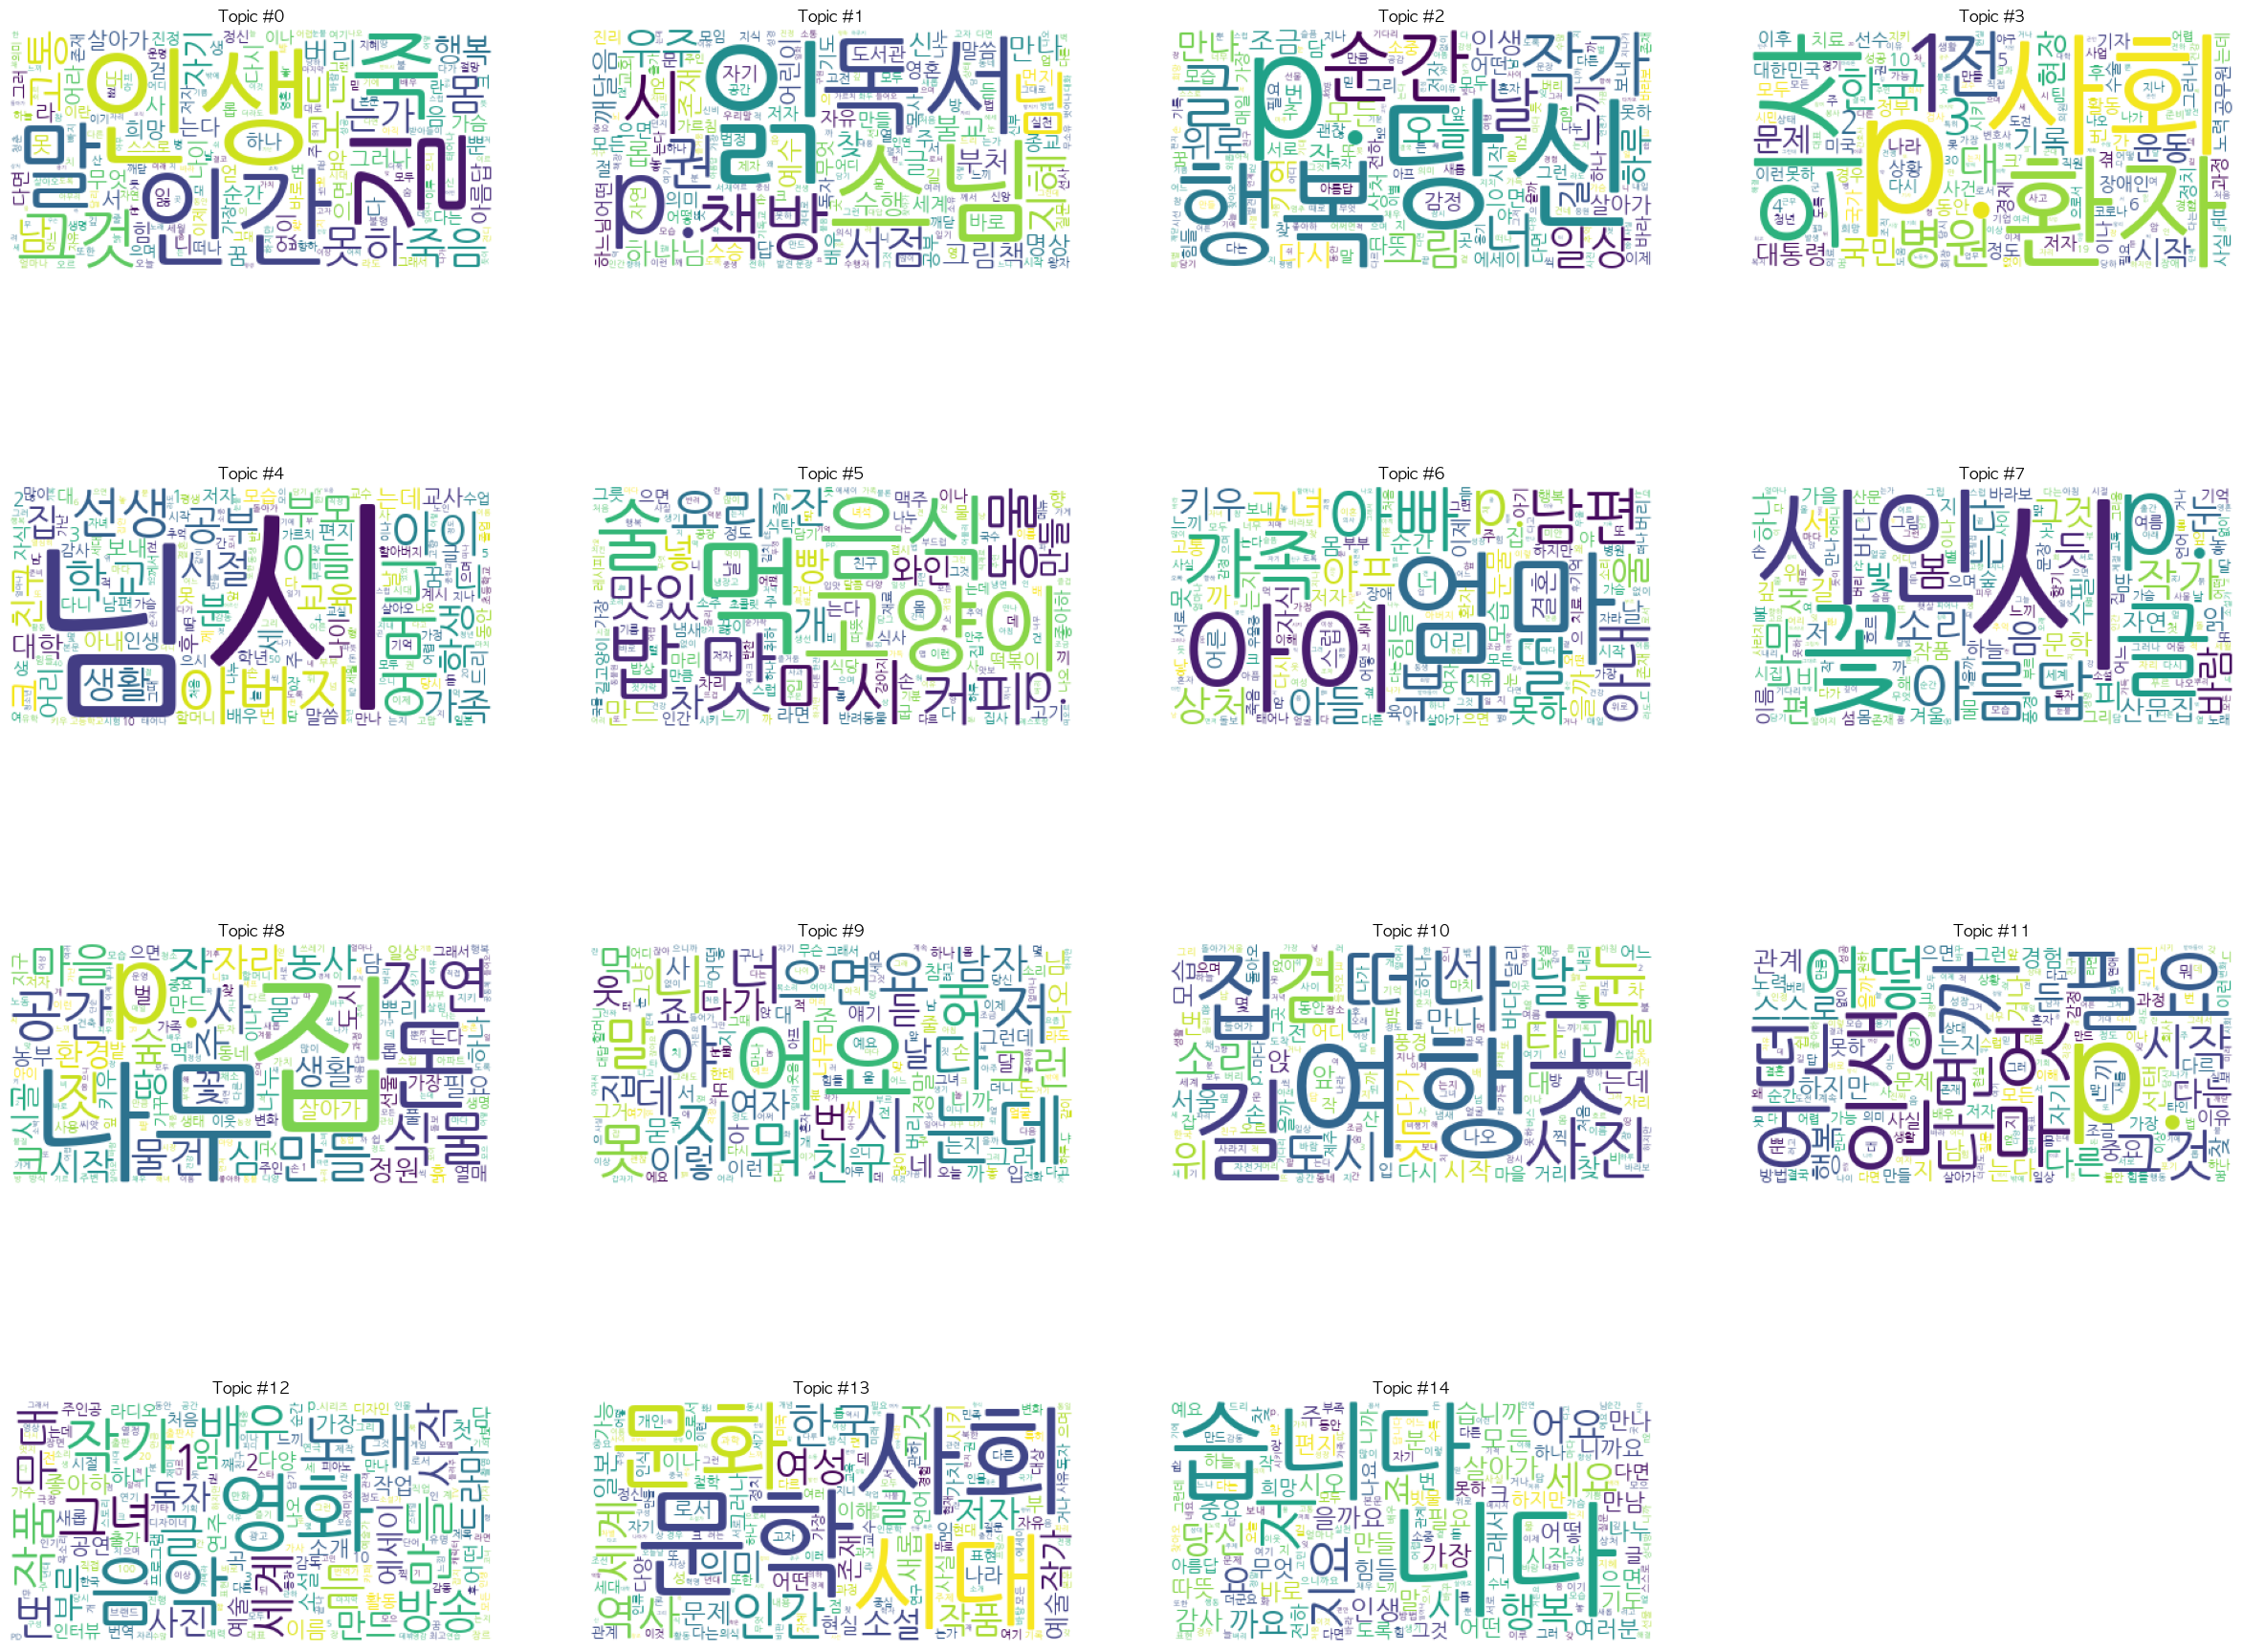

In [47]:
# generate a wordcloud for each topic
from wordcloud import WordCloud 
wc = WordCloud(background_color='white',
        font_path='/Users/hyo-cheolahn/Library/Fonts/NanumGothic-Regular')

plt.figure(figsize=(30,30))
for t in range(lda.num_topics):
    plt.subplot(5,4,t+1)
    x = dict(lda.show_topic(t,200))
    im = wc.generate_from_frequencies(x)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t))

In [48]:
import pyLDAvis
import pyLDAvis.gensim_models

In [49]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11     0.017420  0.050539       1        1  16.989487
2     -0.091936  0.053952       2        1  11.001534
10    -0.098896 -0.135828       3        1   9.904222
7     -0.032163 -0.030704       4        1   8.865749
0     -0.061781  0.100669       5        1   8.505341
9     -0.196007 -0.047330       6        1   8.448251
3      0.121067 -0.042719       7        1   6.063406
4     -0.038671 -0.055073       8        1   5.938926
6     -0.139578  0.029134       9        1   5.482002
13     0.262667  0.017988      10        1   5.454698
12     0.151905 -0.148444      11        1   3.551923
8      0.051903 -0.027344      12        1   2.961206
14    -0.016724  0.273203      13        1   2.845721
5     -0.051003 -0.128220      14        1   2.370793
1      0.121797  0.090177      15        1   1.616740, topic_info=     Term          Freq         Total Category  logprob  loglift
416   ᆸ니다  31407.000000  31407.000000  Default  30.0000  30.0000
555   습니다  26840.000000  26840.000000  Default  29.0000  29.0000
2205   엄마  15200.000000  15200.000000  Default  28.0000  28.0000
1872   아이  18446.000000  18446.000000  Default  27.0000  27.0000
775     시  27914.000000  27914.000000  Default  26.0000  26.0000
...   ...           ...           ...      ...      ...      ...
625    존재    509.506156   8790.541142  Topic15  -5.3273   1.2768
62      글    512.910050  17376.750334  Topic15  -5.3207   0.6020
543    세계    473.026415   8064.485446  Topic15  -5.4016   1.2887
165    무엇    452.305321  11556.884382  Topic15  -5.4464   0.8841
290    으면    450.499450  15426.037227  Topic15  -5.4504   0.5913

[1184 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         1  0.091463    1
0         2  0.049521    1
0         3  0.124561    1
0         4  0.006822    1
0         5  0.011622    1
...     ...       ...  ...
3245      2  0.731035   힘주
3245      4  0.027761   힘주
3245      6  0.092536   힘주
3245      7  0.064775   힘주
3245      9  0.064775   힘주

[5173 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 3, 11, 8, 1, 10, 4, 5, 7, 14, 13, 9, 15, 6, 2])

In [50]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument  # TaggedDocument는 corpus의 id(=tag)를 함께 넘겨줌
docs=[ d.split() for d in df['texts_tokenized'].to_list()]
tagged_data = [TaggedDocument(d, tags=[str(i)]) for i, d in enumerate(docs)]